# Práctica 4 electromagnetismo 🧲🧭
## Resistividad.

# Código para ajuste de datos. 📖📊

In [1]:
# Importación de módulos.

import pandas as pd #Extración de datos.
from scipy import stats #Arreglo lineal
import numpy as np #Ajustesd de datos.
import matplotlib.pyplot as plt #Graficar los datos.
from sympy import symbols #usos de simbolos

In [2]:
# importación de datos.
#Resistividad_cobre_a_293
path = "resistividad_cobre_a_293.xlsx" #Se extrae el archivo
data = pd.read_excel(path) #Se asigna a un dataframe

In [3]:
#Impresión de los datos.
data

,Temperatura(K),r_r(293.15 K)
0,1,0.00111
1,4,0.00111
2,7,0.00111
3,10,0.00112
4,15,0.00121
5,20,0.00155
6,25,0.00249
7,30,0.00459
8,35,0.00815
9,40,0.01330


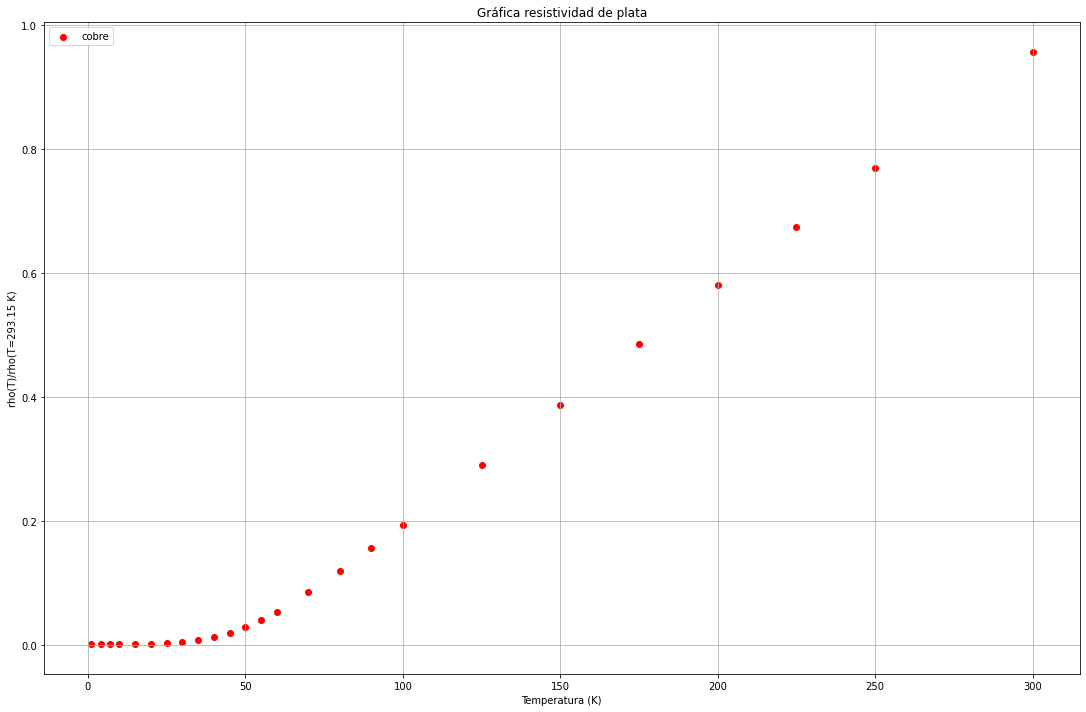

In [4]:
#Gráfica lineal.
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,10)) #Marco para la gráfica
ax.scatter(data['Temperatura(K)'],data['r_r(293.15 K)'],color='r',label="cobre") #Dibujar en puntitos
plt.grid(True) #Cuadricula
plt.xlabel('Temperatura (K)') #Dar nombre al eje x
plt.title("Gráfica resistividad de plata")
plt.tight_layout() #Que la leyenda si salga
plt.legend(loc='upper left') #Colocación de la leyende de 'Cobre'
plt.ylabel('rho(T)/rho(T=293.15 K)') #Nombre al eje y
plt.savefig("graph_1.png") #Guarda la gráfica
plt.show() #Muestra el gráfico

In [5]:
#Funciones y variables.
#Función para obtención de datos x,y
def Depuracion(data): #Obtiene los datos
  #Eliminar las primeras 12 filas.
  f = data[data['Temperatura(K)']<=55].index #Busca a los que menores o iguales 55K
  drop_filas = data.drop(f) #Los elimina
  return drop_filas #Regresa los datos limpios
def Pendiente(data): #Ajuste lineal
  xy = [i*j for i,j in zip(data['Temperatura(K)'],data['r_r(293.15 K)'])] #
  xy =sum(xy) #suma de cada xy
  x = data['Temperatura(K)'].sum()
  y = data['r_r(293.15 K)'].sum()
  n = data.shape[0]
  x_sqr = sum([i**2 for i in data['Temperatura(K)']])
  y_sqr = sum([i**2 for i in data['r_r(293.15 K)']])
  sum_x_sqr = x**2
  m = (float(n)*xy-x*y)/(float(n)*x_sqr-sum_x_sqr)
  b = (y/n)-m*(x/n)
  return round(m,4),round(b,4)
def Graph(data,m,b,sm,sb):
  a = data.iloc[0]['Temperatura(K)']
  z = data.iloc[data.shape[0]-1]['Temperatura(K)']
  RangeL = np.linspace(a,z)
  fig, ax = plt.subplots(figsize=(15,10))
  ax.scatter(data['Temperatura(K)'],data['r_r(293.15 K)'],color='r',label="cobre")
  ax.plot(RangeL,m*RangeL+b,'-m',label="({}+-{})x+({}+-{})rho/K".format(m,sm,b,sb))
  plt.grid(True)
  plt.xlabel('Temperatura (K)')
  plt.tight_layout()
  plt.legend(loc='upper left')
  plt.ylabel('rho(T)/rho(T=293.15 K)')
  plt.title("Gráfica resistividad de plata")
  plt.savefig("graph_3.png")
  plt.show()

def Incertidumbre(data,m,b): #Incertidumbre
  n = data.shape[0]
  x = data['Temperatura(K)'].sum()
  sum_x_sqr = x**2
  x_sqr = sum([i**2 for i in data['Temperatura(K)']])
  sy =sum([(y-m*x-b)**2 for x,y in zip(data['Temperatura(K)'],data['r_r(293.15 K)'])])/(n-2)**0.5
  sm = sy*((n/((n*x_sqr)-sum_x_sqr)))**0.5
  sb = sy*(x_sqr/(n*x_sqr-sum_x_sqr))**2
  return round(sm,15),round(sb,15)

    Temperatura(K)  r_r(293.15 K)
13              60         0.0538
14              70         0.0854
15              80         0.1192
16              90         0.1558
17             100         0.1929
18             125         0.2894
19             150         0.3875
20             175         0.4846
21             200         0.5799
22             225         0.6747
23             250         0.7690
24             300         0.9564


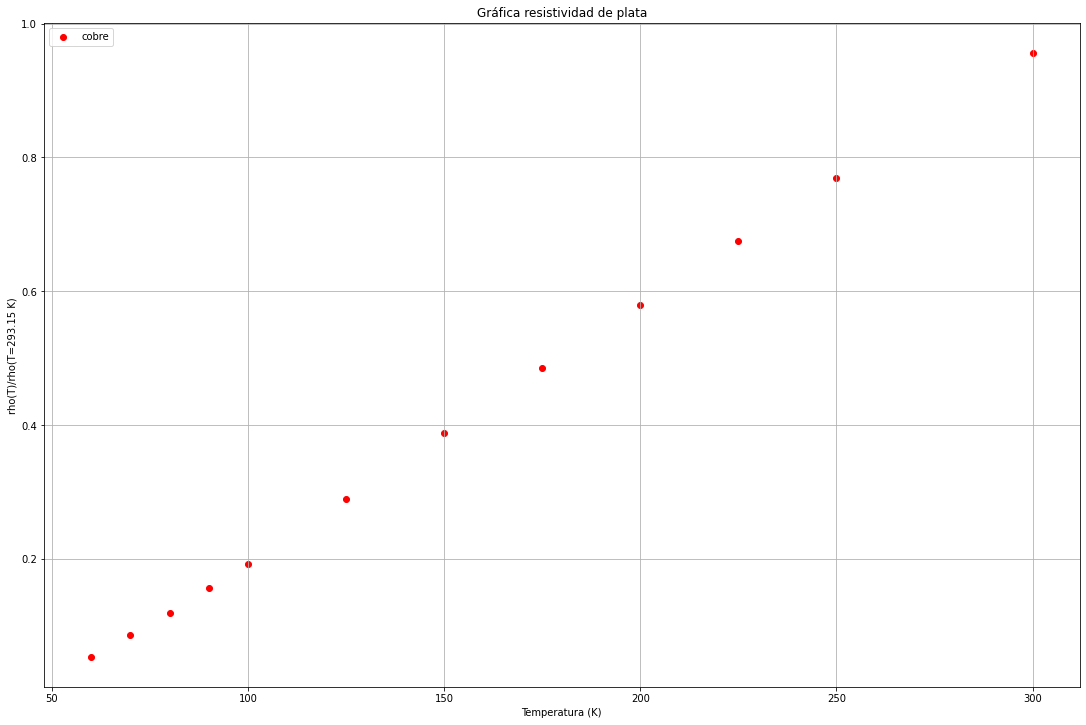

In [6]:
data=Depuracion(data)
print(data) #IMPRESIÓN DE LOS NUEVOS DATOS
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(data['Temperatura(K)'],data['r_r(293.15 K)'],color='r',label="cobre")
plt.grid(True)
plt.xlabel('Temperatura (K)')
plt.tight_layout()
plt.legend(loc='upper left')
plt.title("Gráfica resistividad de plata")

plt.ylabel('rho(T)/rho(T=293.15 K)')
plt.savefig("graph_2.png")
plt.show()

La alpha es: 0.0038


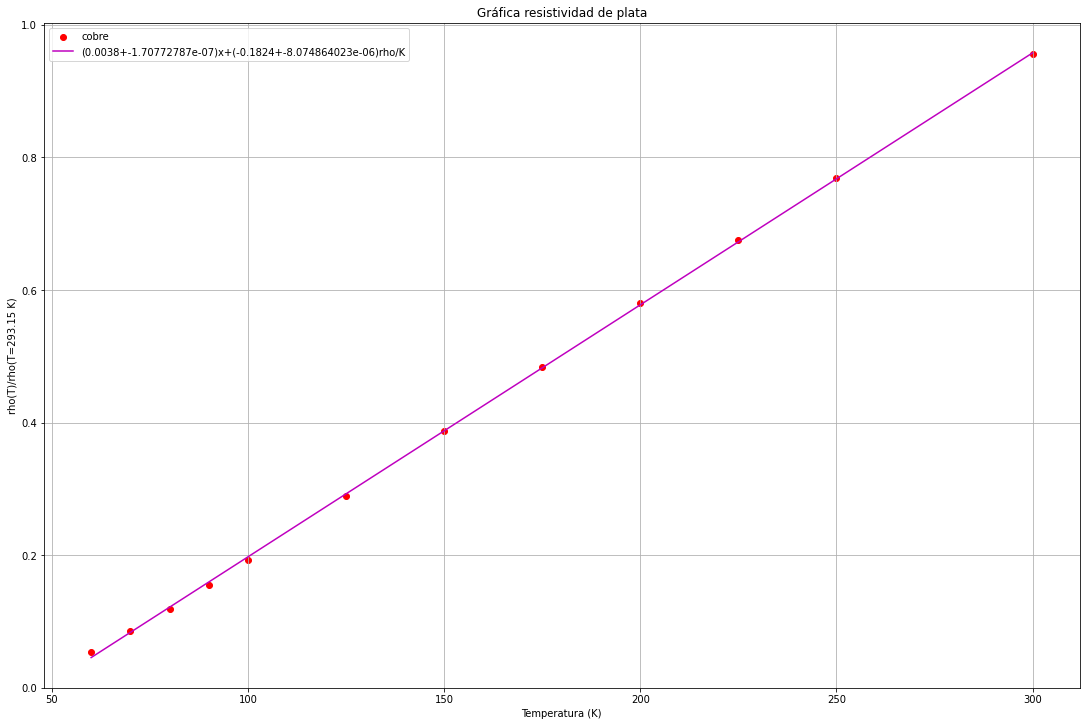

In [7]:
#Obtención de pendiente.
alpha, b = Pendiente(data)
print("La alpha es: {}".format(alpha))
sm,sb=Incertidumbre(data,alpha,b)
Graph(data,alpha,b,sm,sb)